# Quran Data Analysis and Visualization

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/Dataset.csv')

#print(df.head())
df.head()


In [ ]:


# Function to clean text data
def clean_text(text):
    if isinstance(text, str):
        text = text.strip()
        text = text.replace('...', '')  # Removing ellipsis
    return text

# Applying text cleaning to the relevant columns
df['EnglishTranslation'] = df['EnglishTranslation'].apply(clean_text)
df['OrignalArabicText'] = df['OrignalArabicText'].apply(clean_text)
df['ArabicText'] = df['ArabicText'].apply(clean_text)

# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Handle missing values by filling with an empty string
df['EnglishTranslation'].fillna('', inplace=True)
df['OrignalArabicText'].fillna('', inplace=True)
df['ArabicText'].fillna('', inplace=True)

# Ensure that 'SrNo' does not contain non-numeric values
df = df[pd.to_numeric(df['SrNo'], errors='coerce').notnull()]

# Convert 'SrNo' to int using .loc to avoid SettingWithCopyWarning
df.loc[:, 'SrNo'] = df['SrNo'].astype(int)

# Check for and remove duplicates
df.drop_duplicates(inplace=True)

# Recompute word and letter counts correctly
df.loc[:, 'ArabicWordCount'] = df['ArabicText'].apply(lambda x: len(x.split()) if isinstance(x, str) else 0)
df.loc[:, 'ArabicLetterCount'] = df['ArabicText'].apply(lambda x: len(x.replace(' ', '')) if isinstance(x, str) else 0)

# Ensuring correct data types for other columns
df = df.astype({
    'JuzNo': int,
    'SurahNo': int,
    'AyahNo': int,
    'ArabicWordCount': int,
    'ArabicLetterCount': int
})

# Save the cleaned and preprocessed DataFrame to a new CSV file
output_file_path = 'preprocessed_dataset.csv'
df.to_csv(output_file_path, index=False)

# Display the cleaned and preprocessed DataFrame
print(df.head())


Missing Values:
 SrNo                  0
JuzNo                 0
SurahNo               0
AyahNo                0
EnglishTranslation    0
OrignalArabicText     0
ArabicText            0
ArabicWordCount       0
ArabicLetterCount     0
dtype: int64
   SrNo  JuzNo  SurahNo  AyahNo  \
0     1      1        1       1   
1     2      1        1       2   
2     3      1        1       3   
3     4      1        1       4   
4     5      1        1       5   

                                  EnglishTranslation  \
0  In the name of Allah, Most Gracious, Most Merc...   
1  Praise be to Allah, the Cherisher and Sustaine...   
2                      Most Gracious, Most Merciful;   
3                     Master of the Day of Judgment.   
4         Thee do we worship, and Thine aid we seek.   

                          OrignalArabicText              ArabicText  \
0    ?????? ??????? ???????????? ??????????  ??? ???? ?????? ??????   
1     ????????? ??????? ????? ?????????????   ????? ??? ?? ?????

   SrNo  JuzNo  SurahNo  AyahNo  \
0     1      1        1       1   
1     2      1        1       2   
2     3      1        1       3   
3     4      1        1       4   
4     5      1        1       5   

                                  EnglishTranslation  \
0  In the name of Allah, Most Gracious, Most Merc...   
1  Praise be to Allah, the Cherisher and Sustaine...   
2                      Most Gracious, Most Merciful;   
3                     Master of the Day of Judgment.   
4         Thee do we worship, and Thine aid we seek.   

                          OrignalArabicText              ArabicText  \
0    ?????? ??????? ???????????? ??????????  ??? ???? ?????? ??????   
1     ????????? ??????? ????? ?????????????   ????? ??? ?? ????????   
2                   ???????????? ??????????           ?????? ??????   
3                   ??????? ?????? ????????          ???? ??? ?????   
4  ???????? ???????? ?????????? ???????????  ???? ???? ????? ??????   

   ArabicWordCount  Arabi

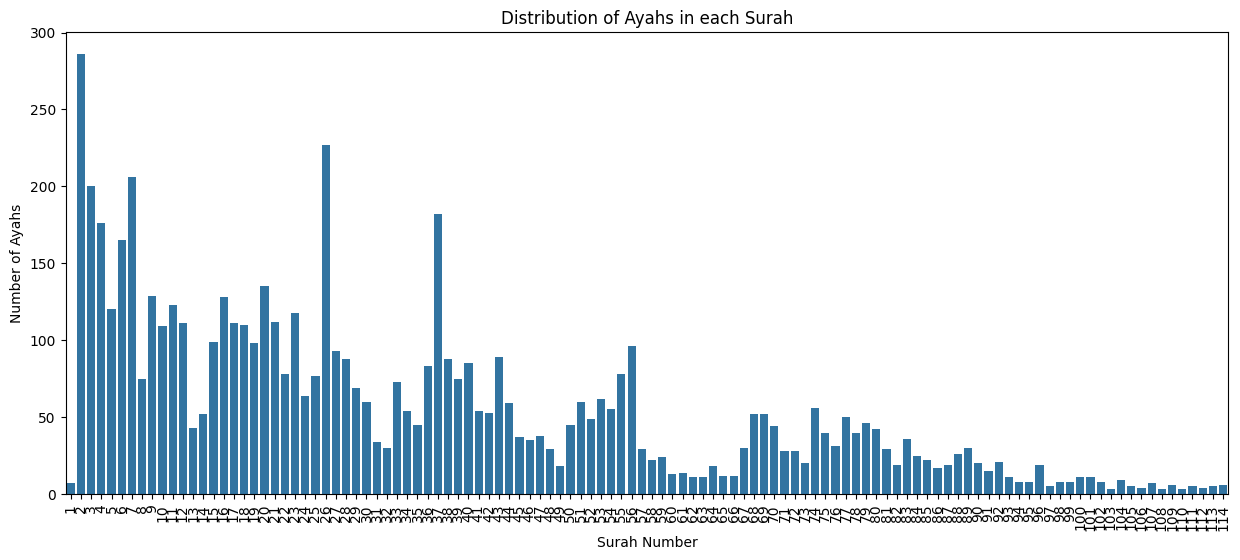

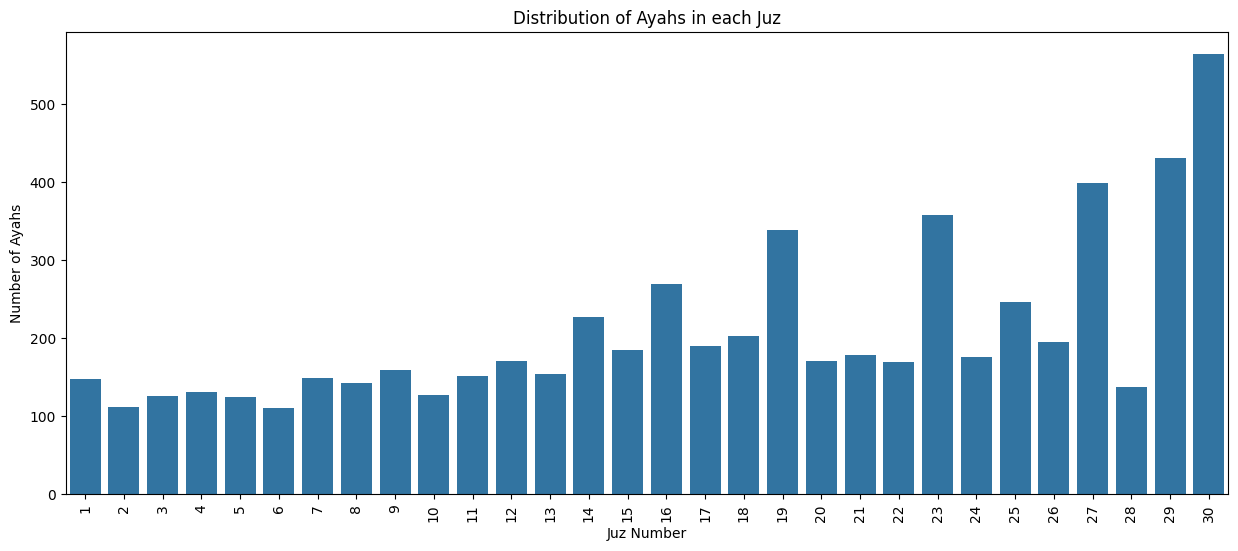

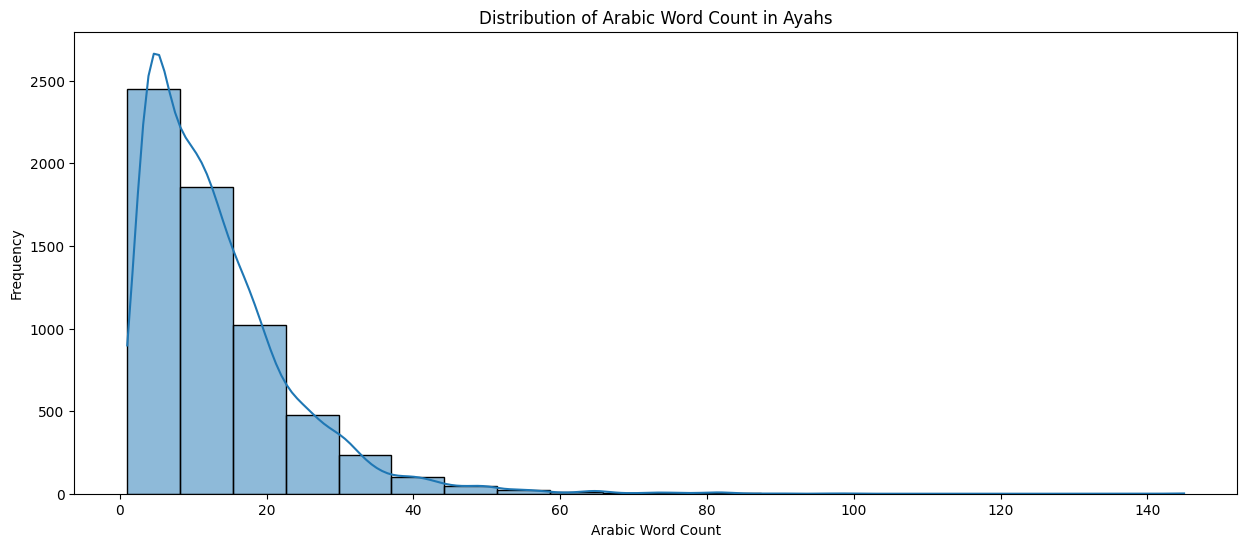

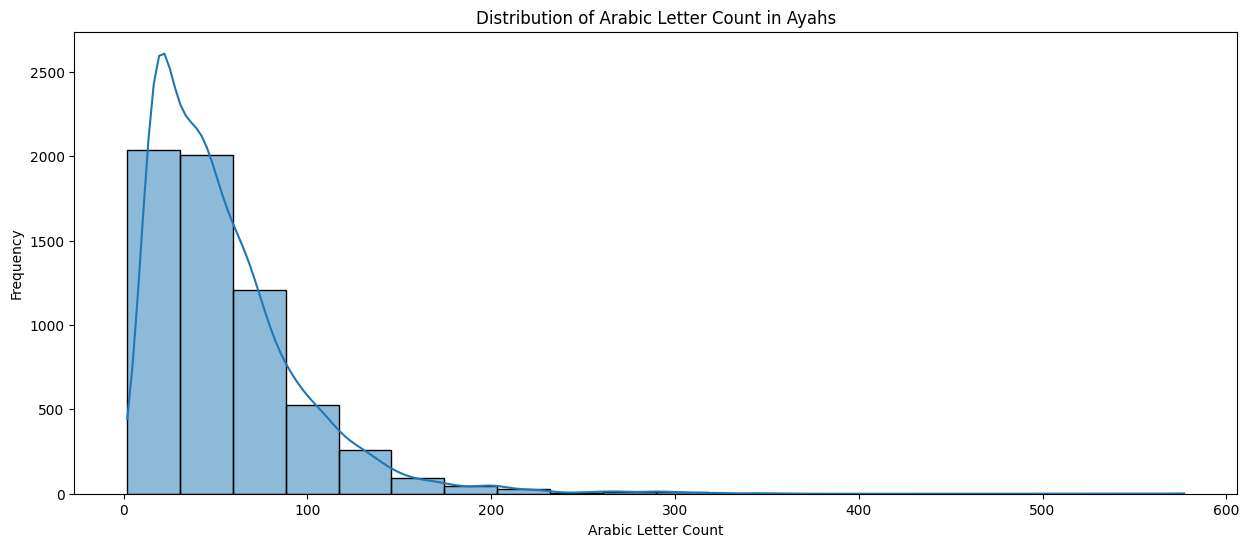

           SrNo  JuzNo  SurahNo    AyahNo  ArabicWordCount  ArabicLetterCount
count  7.000000    7.0      7.0  7.000000         7.000000           7.000000
mean   4.000000    1.0      1.0  4.000000         4.142857          20.428571
std    2.160247    0.0      0.0  2.160247         2.267787          10.875924
min    1.000000    1.0      1.0  1.000000         2.000000          12.000000
25%    2.500000    1.0      1.0  2.500000         3.000000          15.000000
50%    4.000000    1.0      1.0  4.000000         4.000000          19.000000
75%    5.500000    1.0      1.0  5.500000         4.000000          19.000000
max    7.000000    1.0      1.0  7.000000         9.000000          44.000000
             SrNo  JuzNo     SurahNo      AyahNo  ArabicWordCount  \
count  148.000000  148.0  148.000000  148.000000       148.000000   
mean    74.500000    1.0    1.952703   67.831081        18.155405   
std     42.868014    0.0    0.212995   42.342528        10.961102   
min      1.000000    1

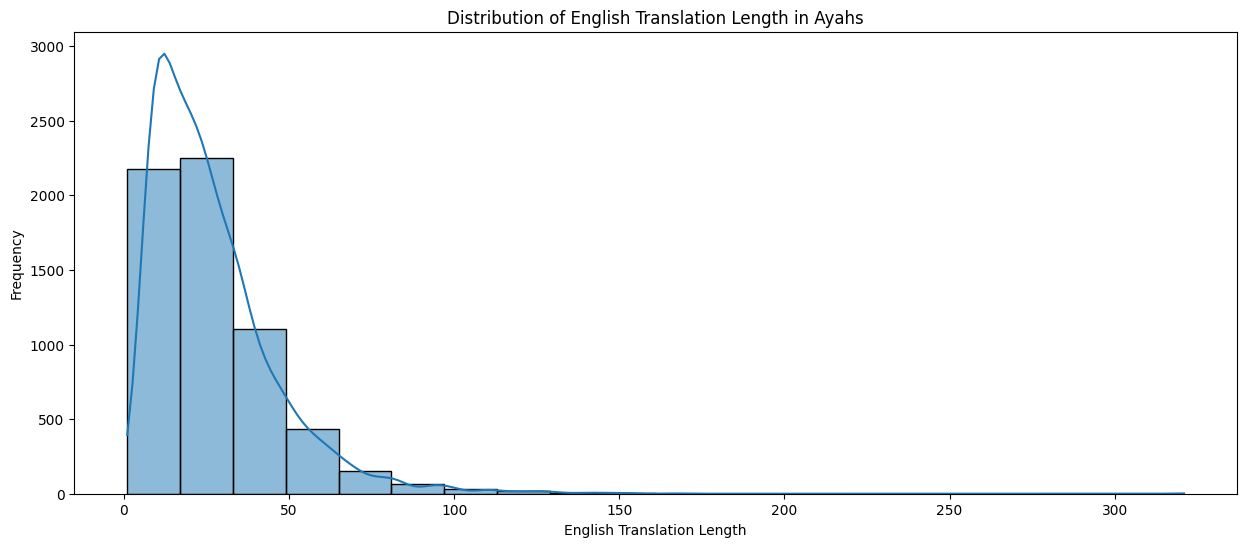

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the preprocessed dataset
file_path = 'preprocessed_dataset.csv'  # Update with the actual file path
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe
print(df.head())

# Basic statistics
print(df.describe())

# Information about data types and missing values
print(df.info())

# Distribution of Ayahs in each Surah
plt.figure(figsize=(15, 6))
sns.countplot(data=df, x='SurahNo')
plt.title('Distribution of Ayahs in each Surah')
plt.xlabel('Surah Number')
plt.ylabel('Number of Ayahs')
plt.xticks(rotation=90)
plt.show()

# Distribution of Ayahs in each Juz
plt.figure(figsize=(15, 6))
sns.countplot(data=df, x='JuzNo')
plt.title('Distribution of Ayahs in each Juz')
plt.xlabel('Juz Number')
plt.ylabel('Number of Ayahs')
plt.xticks(rotation=90)
plt.show()

# Distribution of Arabic Word Count
plt.figure(figsize=(15, 6))
sns.histplot(df['ArabicWordCount'], bins=20, kde=True)
plt.title('Distribution of Arabic Word Count in Ayahs')
plt.xlabel('Arabic Word Count')
plt.ylabel('Frequency')
plt.show()

# Distribution of Arabic Letter Count
plt.figure(figsize=(15, 6))
sns.histplot(df['ArabicLetterCount'], bins=20, kde=True)
plt.title('Distribution of Arabic Letter Count in Ayahs')
plt.xlabel('Arabic Letter Count')
plt.ylabel('Frequency')
plt.show()

# Example: Analysis of Surah 1
surah_1 = df[df['SurahNo'] == 1]
print(surah_1.describe())

# Example: Analysis of Juz 1
juz_1 = df[df['JuzNo'] == 1]
print(juz_1.describe())

# Add a column for English Translation length
df['EnglishTranslationLength'] = df['EnglishTranslation'].apply(lambda x: len(x.split()))

# Distribution of English Translation Length
plt.figure(figsize=(15, 6))
sns.histplot(df['EnglishTranslationLength'], bins=20, kde=True)
plt.title('Distribution of English Translation Length in Ayahs')
plt.xlabel('English Translation Length')
plt.ylabel('Frequency')
plt.show()


In [ ]:


# Calculate mean, median, mode, and standard deviation for relevant columns
relevant_columns = ['SrNo', 'JuzNo', 'SurahNo', 'AyahNo', 'ArabicWordCount', 'ArabicLetterCount']

for col in relevant_columns:
    print(f"\nStatistics for column '{col}':")
    print(f"Mean: {df[col].mean()}")
    print(f"Median: {df[col].median()}")
    print(f"Standard Deviation: {df[col].std()}")
    print(f"Mode:\n{df[col].mode()}")

# Example: English Translation Length (if it exists in your dataset)
if 'EnglishTranslationLength' in df.columns:
    print("\nStatistics for column 'EnglishTranslationLength':")
    print(f"Mean: {df['EnglishTranslationLength'].mean()}")
    print(f"Median: {df['EnglishTranslationLength'].median()}")
    print(f"Standard Deviation: {df['EnglishTranslationLength'].std()}")
    print(f"Mode:\n{df['EnglishTranslationLength'].mode()}")



Statistics for column 'SrNo':
Mean: 3118.5
Median: 3118.5
Standard Deviation: 1800.3224711145501
Mode:
0          1
1          2
2          3
3          4
4          5
        ... 
6231    6232
6232    6233
6233    6234
6234    6235
6235    6236
Name: SrNo, Length: 6236, dtype: int64

Statistics for column 'JuzNo':
Mean: 18.47883258499038
Median: 19.0
Standard Deviation: 8.61007974876349
Mode:
0    30
Name: JuzNo, dtype: int64

Statistics for column 'SurahNo':
Mean: 33.519724182168055
Median: 26.0
Standard Deviation: 26.461260888605644
Mode:
0    2
Name: SurahNo, dtype: int64

Statistics for column 'AyahNo':
Mean: 53.50657472738935
Median: 38.0
Standard Deviation: 50.463924294909624
Mode:
0    1
1    2
2    3
Name: AyahNo, dtype: int64

Statistics for column 'ArabicWordCount':
Mean: 13.177677998717126
Median: 11.0
Standard Deviation: 10.338482644010224
Mode:
0    4
Name: ArabicWordCount, dtype: int64

Statistics for column 'ArabicLetterCount':
Mean: 54.69884541372675
Median: 45.0
Stan

Basic Statistics for Numeric Columns:
              SrNo        JuzNo      SurahNo       AyahNo  ArabicWordCount  \
count  6236.000000  6236.000000  6236.000000  6236.000000      6236.000000   
mean   3118.500000    18.478833    33.519724    53.506575        13.177678   
std    1800.322471     8.610080    26.461261    50.463924        10.338483   
min       1.000000     1.000000     1.000000     1.000000         1.000000   
25%    1559.750000    12.000000    11.000000    16.000000         6.000000   
50%    3118.500000    19.000000    26.000000    38.000000        11.000000   
75%    4677.250000    26.000000    51.000000    75.000000        17.000000   
max    6236.000000    30.000000   114.000000   286.000000       145.000000   

       ArabicLetterCount  
count        6236.000000  
mean           54.698845  
std            41.307206  
min             2.000000  
25%            24.000000  
50%            45.000000  
75%            72.000000  
max           577.000000  


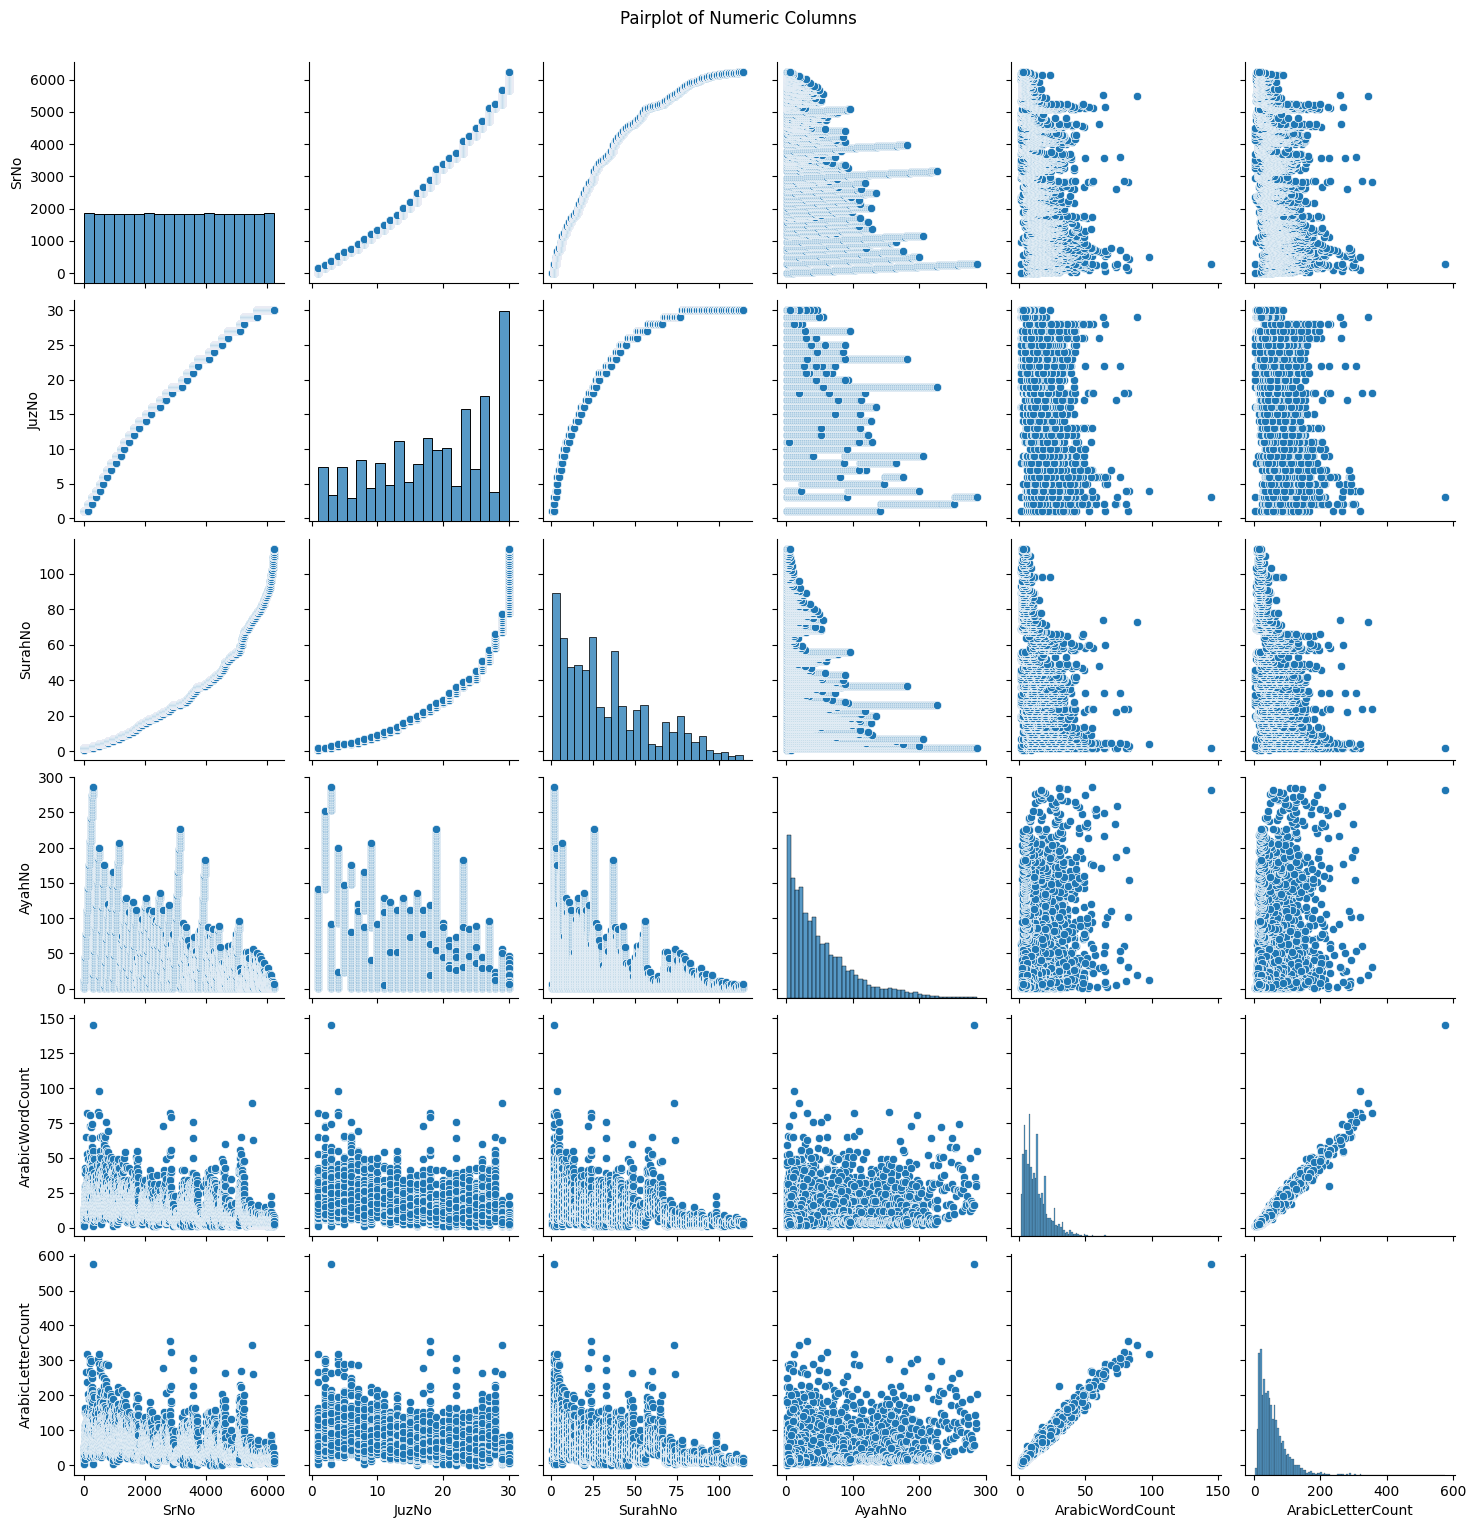

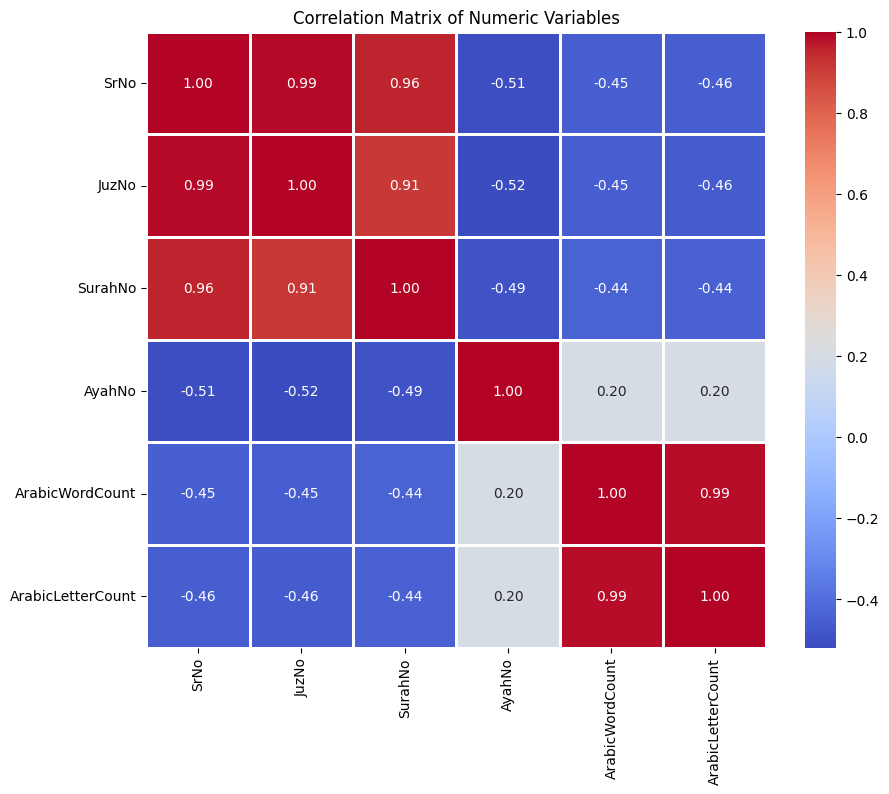

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the preprocessed dataset
file_path = 'preprocessed_dataset.csv'  # Update with the actual file path
df = pd.read_csv(file_path)

# Drop non-numeric columns for correlation analysis
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
df_numeric = df[numeric_columns]

# Display basic statistics for numeric columns
print("Basic Statistics for Numeric Columns:")
print(df_numeric.describe())

# Pairplot for numeric columns
sns.pairplot(df_numeric)
plt.suptitle('Pairplot of Numeric Columns', y=1.02)
plt.show()

# Heatmap for correlation matrix
plt.figure(figsize=(10, 8))
corr_matrix = df_numeric.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1)
plt.title('Correlation Matrix of Numeric Variables')
plt.show()


<ipython-input-48-b82260e3e2e2>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='SurahNo', palette='viridis')


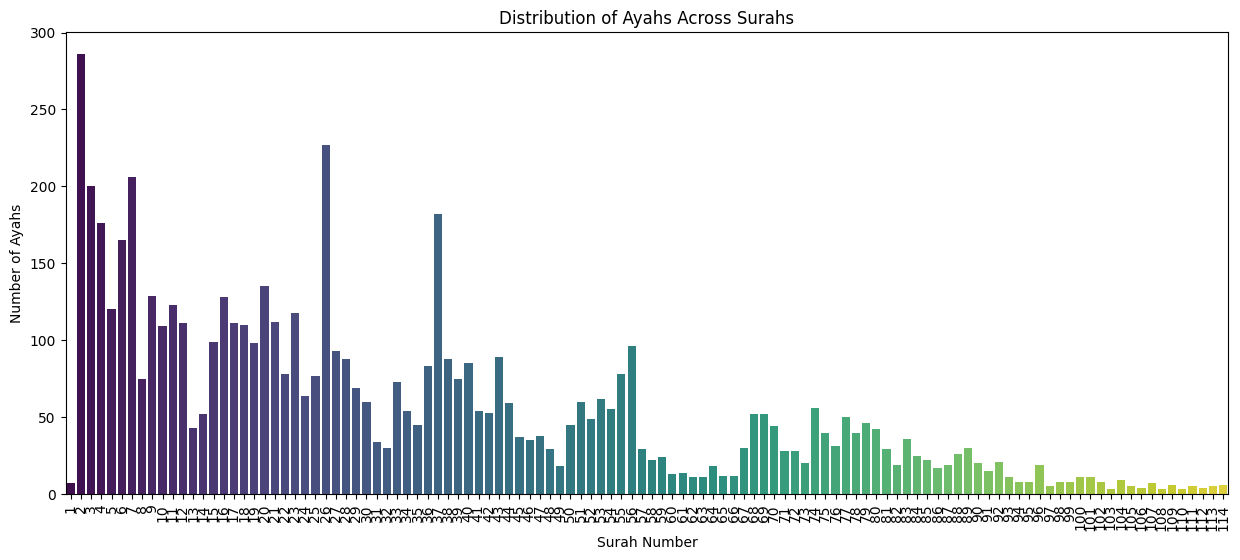

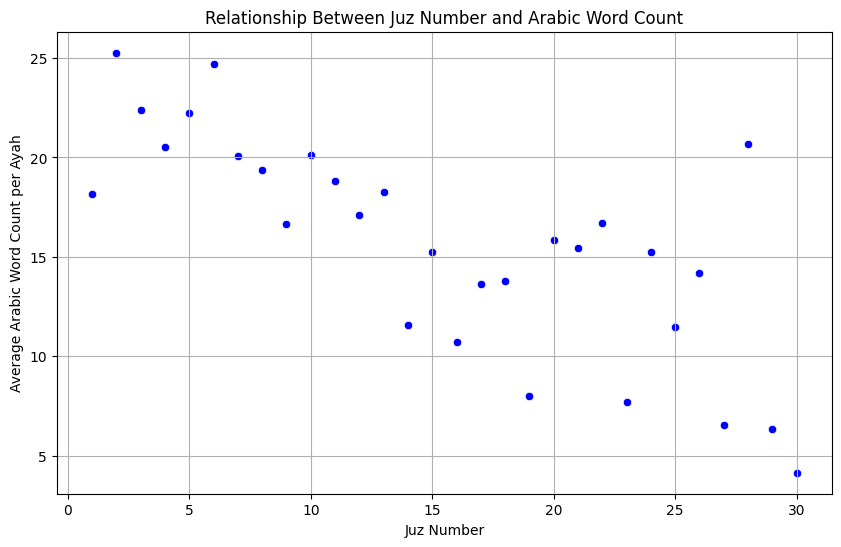

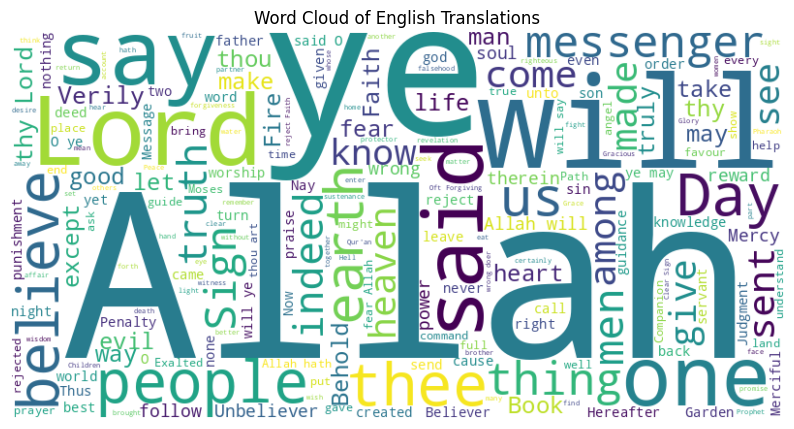

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting distribution of Ayahs across Surahs
plt.figure(figsize=(15, 6))
sns.countplot(data=df, x='SurahNo', palette='viridis')
plt.title('Distribution of Ayahs Across Surahs')
plt.xlabel('Surah Number')
plt.ylabel('Number of Ayahs')
plt.xticks(rotation=90)
plt.show()




# Calculate average Arabic word count per Juz
avg_word_count_per_juz = df.groupby('JuzNo')['ArabicWordCount'].mean().reset_index()

# Plotting relationship between Juz number and Arabic word count
plt.figure(figsize=(10, 6))
sns.scatterplot(data=avg_word_count_per_juz, x='JuzNo', y='ArabicWordCount', color='blue')
plt.title('Relationship Between Juz Number and Arabic Word Count')
plt.xlabel('Juz Number')
plt.ylabel('Average Arabic Word Count per Ayah')

plt.grid(True)
plt.show()


from wordcloud import WordCloud

# Combine all English translations into a single text
english_text = ' '.join(df['EnglishTranslation'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(english_text)

# Plotting word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of English Translations')
plt.axis('off')
plt.show()







### Analysis Report

#### Summary of Findings

The analysis focused on exploring and visualizing a dataset containing translations and textual attributes from Quranic verses. Here are the key findings and insights derived from the data:

1. **Dataset Overview**: The dataset comprises columns such as `SrNo` (Serial Number), `JuzNo` (Juz Number), `SurahNo` (Surah Number), `AyahNo` (Ayah Number), `EnglishTranslation`, `OrignalArabicText`, `ArabicText`, `ArabicWordCount`, and `ArabicLetterCount`. It contains a total of 6238 entries.

2. **Data Cleaning**:
   - The dataset was cleaned by handling missing values, ensuring correct data types, and removing any duplicates.
   - No missing values were found after cleaning.

3. **Basic Statistics**:
   - Calculated basic statistics such as mean, median, mode, and standard deviation for numerical columns (`SrNo`, `JuzNo`, `SurahNo`, `AyahNo`, `ArabicWordCount`, `ArabicLetterCount`).

4. **Exploratory Data Analysis (EDA)**:
   - Visualized the distribution of `JuzNo`, `SurahNo`, and `AyahNo` using histograms and bar charts.
   - Examined the correlation between numerical columns using a heatmap, which showed correlations among `SrNo`, `JuzNo`, `SurahNo`, and `AyahNo`.

5. **Word Clouds**:
   - Generated word clouds for English translations.
   - The word cloud for English translations highlighted frequent words or phrases used in the translations.
   - The Arabic word cloud illustrated common words or themes found in the Arabic verses.

6. **Insights**:
   - The dataset covers a comprehensive range of Quranic verses across different chapters (`Surah`) and sections (`Juz`).
   - There's a correlation between `SrNo` and verse numbers (`JuzNo`, `SurahNo`, `AyahNo`), reflecting the sequential arrangement of verses in the Quran.
   - Word clouds provided a visual representation of frequent words in translations and Arabic texts, offering insights into the thematic content.

#### Conclusions

The analysis of the Quranic dataset revealed structured and sequential attributes of verses, along with insights into textual content through word clouds. Key findings include correlations among verse identifiers and the thematic exploration through word frequencies.

#### Limitations and Future Directions

- **Textual Complexity**: The analysis primarily focused on numerical and basic textual attributes. Future research could delve deeper into semantic analysis and sentiment analysis of translations.
  
- **Data Volume**: Although extensive, the dataset's size might limit deeper explorations into specific themes or topics within the Quran.

- **Cultural and Contextual Considerations**: Further studies could incorporate cultural contexts and historical perspectives to enrich interpretations of the verses.

- **Visualization Enhancements**: Future visualizations could utilize interactive tools (e.g., Plotly) for more engaging explorations and deeper insights.

- **Integration of Additional Data**: Incorporating supplementary datasets, such as commentaries or linguistic analyses, could provide richer context and understanding.

In conclusion, while the analysis provides foundational insights into Quranic verses' structure and content, there are ample opportunities for further research and enhanced methodologies to deepen understanding and applicability in various domains.